# 0. Import necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Read csv and columns

In [2]:
df = pd.read_csv("OUTPUT/df_clean.csv", encoding = "latin-1")
print(df.shape)
df

(6301, 10)


,type,country,activity,sex,age,fatal (y/n),species,month,year,decades
0,boat,usa,paddle,F,57,N,white,Jun,2018,"[2010, 2020)"
1,unprovoked,usa,standing,F,11,N,unknown,Jun,2018,"[2010, 2020)"
2,invalid,usa,surfing,M,48,N,unknown,Jun,2018,"[2010, 2020)"
3,unprovoked,australia,surfing,M,0,N,unknown,Jun,2018,"[2010, 2020)"
4,provoked,mexico,diving,M,0,N,tiger,Jun,2018,"[2010, 2020)"
...,...,...,...,...,...,...,...,...,...,...
6296,unprovoked,australia,diving,M,0,Y,unknown,unknown,1903,"[1900, 1910)"
6297,unprovoked,australia,diving,M,0,Y,unknown,unknown,1903,"[1900, 1910)"
6298,unprovoked,usa,swimming,M,0,Y,unknown,unknown,1900,"[1900, 1910)"
6299,unprovoked,panama,unknown,M,0,Y,unknown,unknown,1883,"[1880, 1890)"


In [3]:
df.columns

Index(['type', 'country', 'activity', 'sex', 'age', 'fatal (y/n)', 'species',
       'month', 'year', 'decades'],
      dtype='object')

In [4]:
df.isnull().sum()

type           0
country        0
activity       0
sex            0
age            0
fatal (y/n)    0
species        0
month          0
year           0
decades        0
dtype: int64

# 2. General analysis

# Attacks by dangerousness

In [5]:
attacks = df.groupby(["fatal (y/n)"]).agg({"fatal (y/n)":"count"})
attacks = attacks.rename(columns={"fatal (y/n)": "count"})
attacks = attacks.sort_values("count", ascending=False)
print(attacks.sum())
attacks

count    6301
dtype: int64


,count
fatal (y/n),
N,4302
Y,1389
UNKNOWN,610


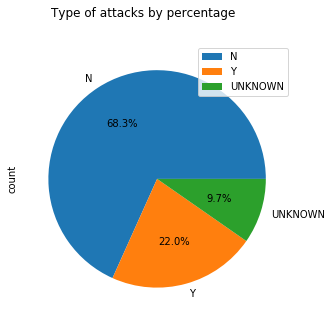

In [6]:
#Type of attacks --> fatal: Yes/No = Y/N
attacks.plot(title = "Type of attacks by percentage", kind = "pie", autopct='%1.1f%%', subplots=True, figsize = (15,5))
plt.show()

# Type of attacks by decades

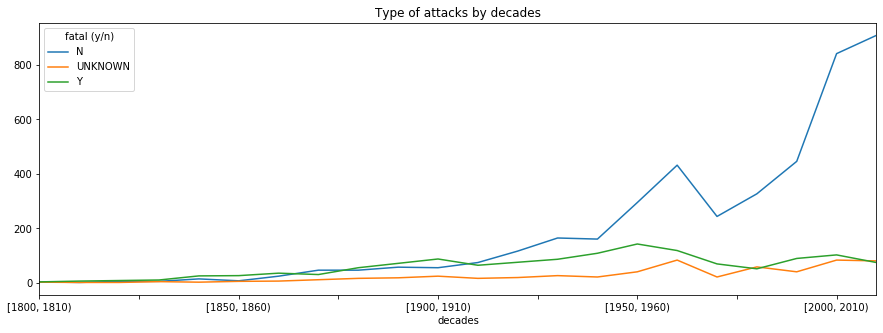

In [23]:
#we have filtered from 1800 on, due to the shark attacks regirested before are close to 0
decades = pd.crosstab(index=df.decades[df['year']>1800], columns=df["fatal (y/n)"])
decades.plot(title = "Type of attacks by decades", figsize = (15,5))
plt.show()

# Attacks by gender

In [8]:
gender = df.groupby(["sex"]).agg({"sex":"count"})
gender = gender.rename(columns={"sex": "count"})
gender = gender.sort_values("count", ascending=False)
print(gender.sum())
gender

count    6301
dtype: int64


,count
sex,
M,5095
F,637
UNKNOWN,569


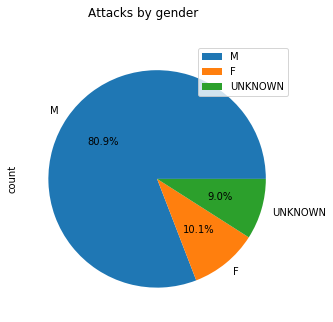

In [9]:
gender.plot(title = "Attacks by gender", kind = "pie", autopct='%1.1f%%', subplots=True, figsize = (15,5))
plt.show()

# Attacks by cause

In [10]:
cause = df.groupby(["type"]).agg({"type":"count"})
cause = cause.rename(columns={"type": "count"})
cause = cause.sort_values("count", ascending=False)
print(cause.sum())
cause

count    6301
dtype: int64


,count
type,
unprovoked,4595
provoked,574
invalid,552
boat,341
sea disaster,239


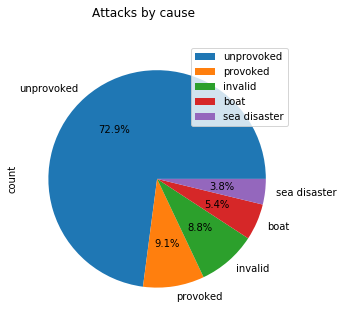

In [11]:
cause.plot(title = "Attacks by cause", kind = "pie", autopct='%1.1f%%', subplots=True, figsize = (15,5))
plt.show()

# Sharks - from most dangerous

In [12]:
species = pd.crosstab(index=df.species[df.species!="unknown"], columns=df["fatal (y/n)"]).sort_values("N",ascending=False)
species

fatal (y/n),N,UNKNOWN,Y
species,,,
white,492,14,150
tiger,208,4,72
bull,139,1,36
nurse,95,1,1
reef,66,0,0
blacktip,64,0,0
whaler,60,1,5
mako,52,0,2
wobbegong,45,1,0


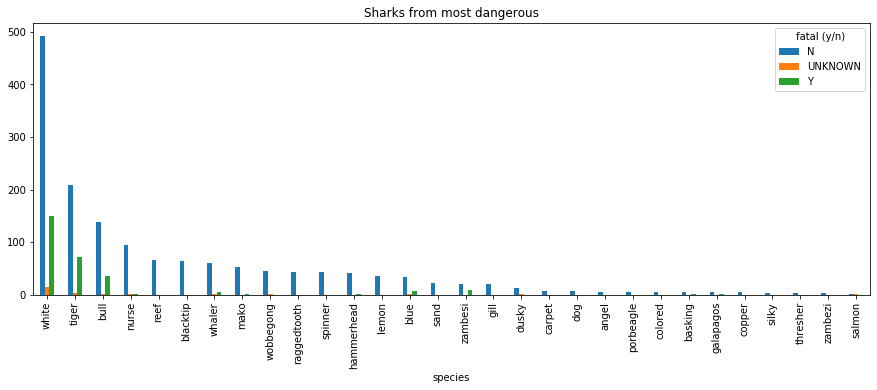

In [13]:
species.plot(title = "Sharks from most dangerous", kind = "bar", figsize = (15,5))
plt.show()

# Attacks by country

In [14]:
#we filter countries with more than 1 attack to reduce the big list
country = pd.crosstab(index=df.country, columns=df["fatal (y/n)"]).sort_values("Y",ascending=False)
country = country[country.Y>1]
country

fatal (y/n),N,UNKNOWN,Y
country,,,
australia,921,134,283
usa,1837,206,186
south africa,407,66,106
no country,71,15,62
papua new guinea,74,4,56
...,...,...,...
bermuda,11,3,2
marshall islands,9,2,2
french polynesia,22,1,2


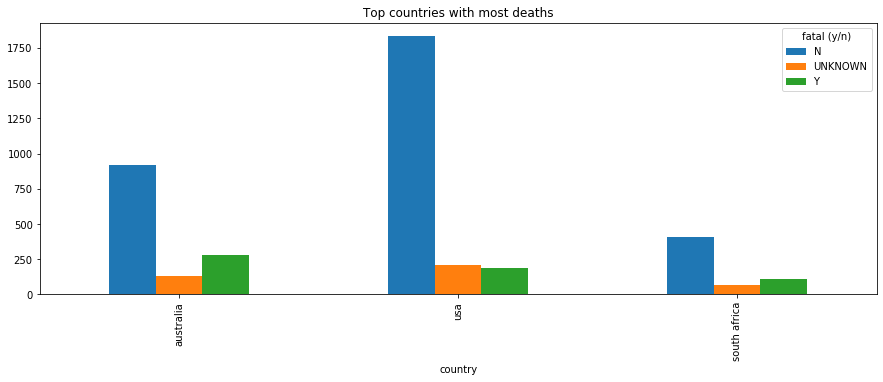

In [15]:
#we have selected the top 3 countries in terms of letal attacks, which are also top 3 in terms of attacks
#here we can see, for instance, the big difference between countries in terms of people attacked by a shark
#and pleople killed by a shark
country[country.Y>70].plot(title = "Top countries with most deaths", kind = "bar", figsize = (15,5))
plt.show()

# Attacks by activity 

In [16]:
#we filter activities with more than 1 attack to reduce the big list
activity = pd.crosstab(index=df.activity[df.activity!="unknown"], columns=df["fatal (y/n)"]).sort_values("Y",ascending=False)
activity = activity[activity.Y>1]
activity

fatal (y/n),N,UNKNOWN,Y
activity,,,
swimming,577,113,416
fishing,906,70,153
diving,362,65,123
surfing,1134,53,74
bathing,76,15,71
boat,33,19,45
fell overboard,3,3,26
standing,82,1,16
body boarding,49,0,15


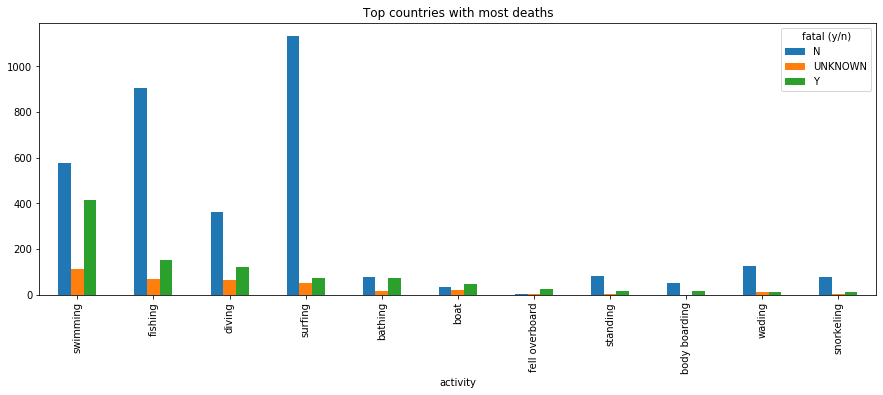

In [17]:
#as well as in the countries chart, this graph allows us to check the big difference of risk you have
#of been attacked by a shark and be killed by it
#1 a surprising fact is the surfing column; although it is, with difference, the most dangerous activity
#the surfers has less probabilities to die in a sharck attack than swimmers
activity[activity.Y>10].plot(title = "Top countries with most deaths", kind = "bar", figsize = (15,5))
plt.show()

# Attacks by age

In [18]:
#we filter age with more than 1 attack to reduce the big list
age = pd.crosstab(index=df.age[df.age!=0], columns=df["fatal (y/n)"]).sort_values("Y",ascending=False)
age = age[age.Y>1]
age

fatal (y/n),N,UNKNOWN,Y
age,,,
18,110,9,34
22,79,7,31
20,111,10,31
17,110,17,29
19,108,6,28
16,108,4,27
21,89,9,24
15,113,2,24
14,75,6,20


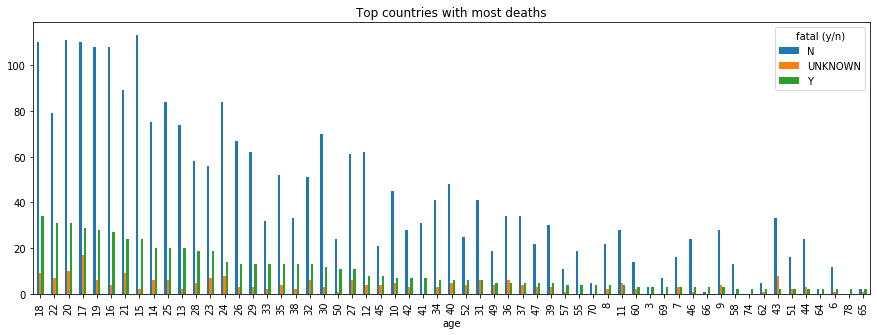

In [19]:
#we could have aranged age, however we wanted to have it like the original data to be more precise
#some aspects to highlight are groups like 24 years old; which are in top 15 most attacked groups but the probality
#of dying in attack is low
age.plot(title = "Top countries with most deaths", kind = "bar", figsize = (15,5))
plt.show()

# 2. In depth analysis

In [29]:
#this part of the case answers the main question of the research: which sharks are the most dangerous?
#well, it depends;
#if we talk about total amount of attacks and deaths, the winner is the white
#however if we talk about probability of dying if you are attacked by a shark, the most dangerous is the zambesi
#but is has only 29 attacks (10 deaths)
#so is the white the most dangerous by far? No
#actually the tiger shark has 25% of deaths out of its attacks, while the white has 23%
#and as the tiger is the 2nd in terms of total attacks and deaths, it should be considered as well as
#the 2md most dangerous just after the white

#however a deeper analysis is needed if we want to answer more specific questions like:
#which is the most dangerous shark in usa?
#when did these sharks kill more people?
#if we are surfing, is it more probable to dye from a white shark attack than a tiger?
#questions to be solved

killers = species[species.Y!=0]
killers["death_per"] = killers.apply(lambda row: round(row.Y/(row.Y + row.N + row.UNKNOWN),2), axis=1)
killers["total_attacks"] = killers.apply(lambda row: int((row.Y + row.N + row.UNKNOWN)), axis=1)
killers

/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/home/diego/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


fatal (y/n),N,UNKNOWN,Y,death_per,total_attacks
species,,,,,
white,492,14,150,0.23,656
tiger,208,4,72,0.25,284
bull,139,1,36,0.20,176
nurse,95,1,1,0.01,97
whaler,60,1,5,0.08,66
mako,52,0,2,0.04,54
hammerhead,42,0,2,0.05,44
blue,33,1,7,0.17,41
zambesi,20,0,9,0.31,29


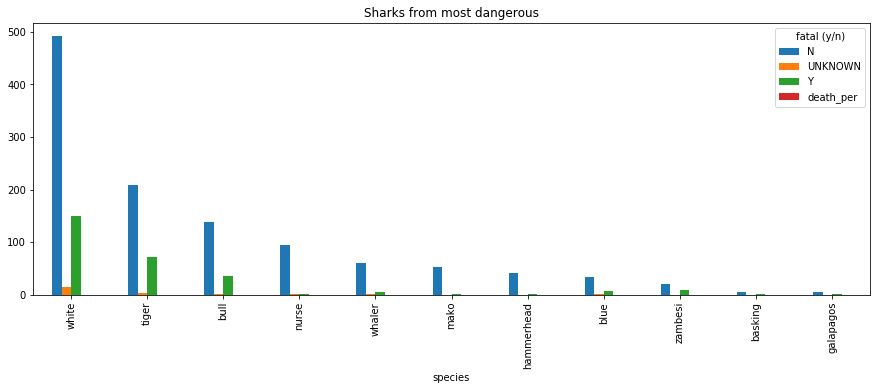

In [21]:
#killer sharks from most kills
killers.plot(title = "Sharks from most dangerous", kind = "bar", figsize = (15,5))
plt.show()

In [30]:
#the cleaning and the analysis we have done, allows us to check the number of attacks, its type and the shark 
#who did it based in the 4 vars we choose

edad = int(input("Select age: "))
acti = input("Select 1 activity surfing, swimming, diving, fishing or bathing: ")
pais = input("Select 1 country australia, usa or south africa: ")
sexo = input("Select M/F: ")
nombre = input("Choose name: ")
nombre = pd.crosstab(index=[df.age[df.age==edad], df.activity[df.activity==acti], df.country[df.country==pais], df.sex[df.sex==sexo], df.species[df.species!="unknown"]], columns=df["fatal (y/n)"])

nombre

Select age: 19
Select 1 activity surfing, swimming, diving, fishing or bathing: surfing
Select 1 country australia, usa or south africa: australia
Select M/F: M
Choose name: juan


fatal (y/n)                         N
age activity country   sex species   
19  surfing  australia M   nurse    2
                           whaler   2